In [36]:
import pandas as pd

# df = pd.read_csv("titanic.csv")

import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
print(df["age"].mean())
print(df["age"].median())
print(df["age"].mode())
print(df["age"].std())
print(df["age"].var())

29.69911764705882
28.0
0    24.0
Name: age, dtype: float64
14.526497332334044
211.0191247463081


In [38]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [39]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [40]:
print(df["fare"].skew())
print(df["fare"].kurt())

4.787316519674893
33.39814088089868


Axes(0.125,0.11;0.775x0.77)


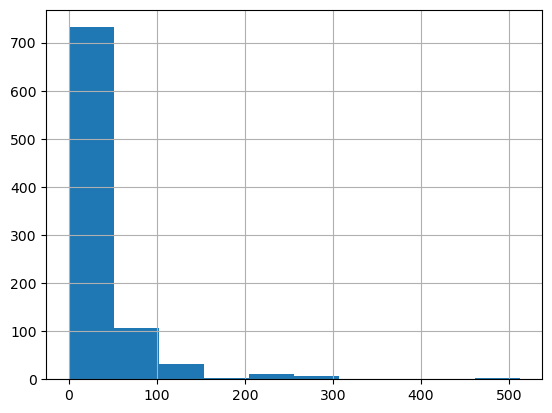

In [41]:
print(df["fare"].hist())

<Axes: xlabel='age', ylabel='Count'>

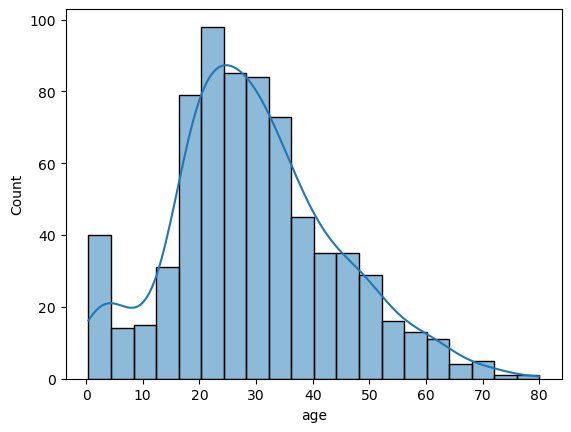

In [42]:
import matplotlib.pyplot as plt

sns.histplot(df["age"], kde=True)

<Axes: xlabel='fare', ylabel='Count'>

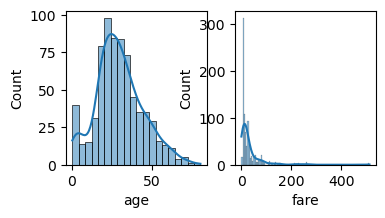

In [43]:
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
sns.histplot(df["age"], kde=True)

plt.subplot(1, 2, 2)
sns.histplot(df["fare"], kde=True)



<Axes: ylabel='fare'>

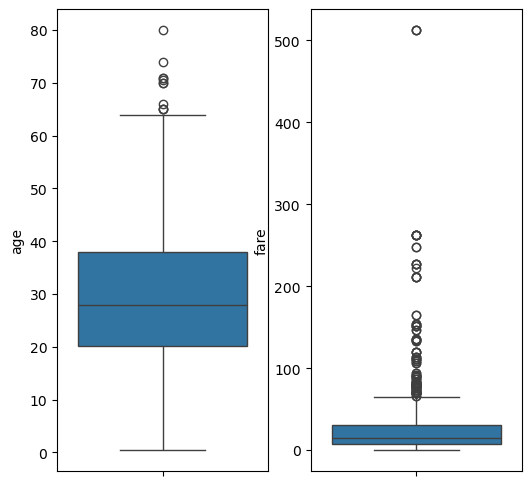

In [44]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df["age"])

plt.subplot(1, 2, 2)
sns.boxplot(df["fare"])



<Axes: ylabel='age'>

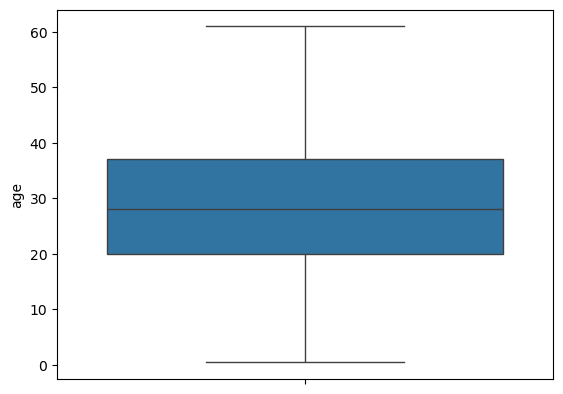

In [45]:
removed_df= df[df["age"]<62]
sns.boxplot(removed_df["age"])


## Data Preprocessing

Data preprocessing is a crucial step in the data analysis pipeline. It involves cleaning and transforming raw data into a format that is suitable for analysis. In this section, we will perform the following preprocessing steps on the Titanic dataset:

1. **Handling Missing Values**: We will identify and handle missing values in the dataset. This may involve filling missing values with appropriate statistics (mean, median, mode) or dropping rows/columns with a significant amount of missing data.

2. **Encoding Categorical Variables**: We will convert categorical variables into numerical format using techniques such as one-hot encoding or label encoding.

3. **Feature Scaling**: We will scale numerical features to ensure they are on a similar scale, which can improve the performance of certain machine learning algorithms.

4. **Splitting the Data**: We will split the dataset into training and testing sets to evaluate the performance of our models.

By performing these preprocessing steps, we aim to improve the quality of the data and enhance the performance of our analysis and machine learning models.

In [46]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
print(df["deck"].unique())

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [48]:
df["age"].fillna(df["age"].median(), inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df["deck"]= df["deck"].cat.add_categories("H")
df["deck"].fillna("H", inplace=True)
df.isnull().sum()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_17144\2842747471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
C:\Users\Ayush\AppData\Local\Temp\ipykernel_17144\2842747471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [49]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())


110
0


In [50]:
df.head()
cat_cols =["sex", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone"]

from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()

    df[col]= le.fit_transform(df[col])

In [51]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [52]:
featured_cols = df.drop(columns=["survived"]).columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
df[featured_cols]= scaler.fit_transform(df[featured_cols])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0.888194,0.774861,-0.554151,0.481309,-0.498347,-0.526784,0.587763,0.888194,-0.351237,0.862151,0.555399,0.587763,-0.839786,-1.144837
1,1,-1.451367,-1.290554,0.608990,0.481309,-0.498347,0.699803,-1.900274,-1.451367,1.271934,-1.159890,-1.766694,-1.900274,1.190780,-1.144837
2,1,0.888194,-1.290554,-0.263365,-0.531904,-0.498347,-0.513854,0.587763,0.888194,1.271934,-1.159890,0.555399,0.587763,1.190780,0.873487
3,1,-1.451367,-1.290554,0.390901,0.481309,-0.498347,0.351494,0.587763,-1.451367,1.271934,-1.159890,-1.766694,0.587763,1.190780,-1.144837
4,0,0.888194,0.774861,0.390901,-0.531904,-0.498347,-0.511460,0.587763,0.888194,-0.351237,0.862151,0.555399,0.587763,-0.839786,0.873487


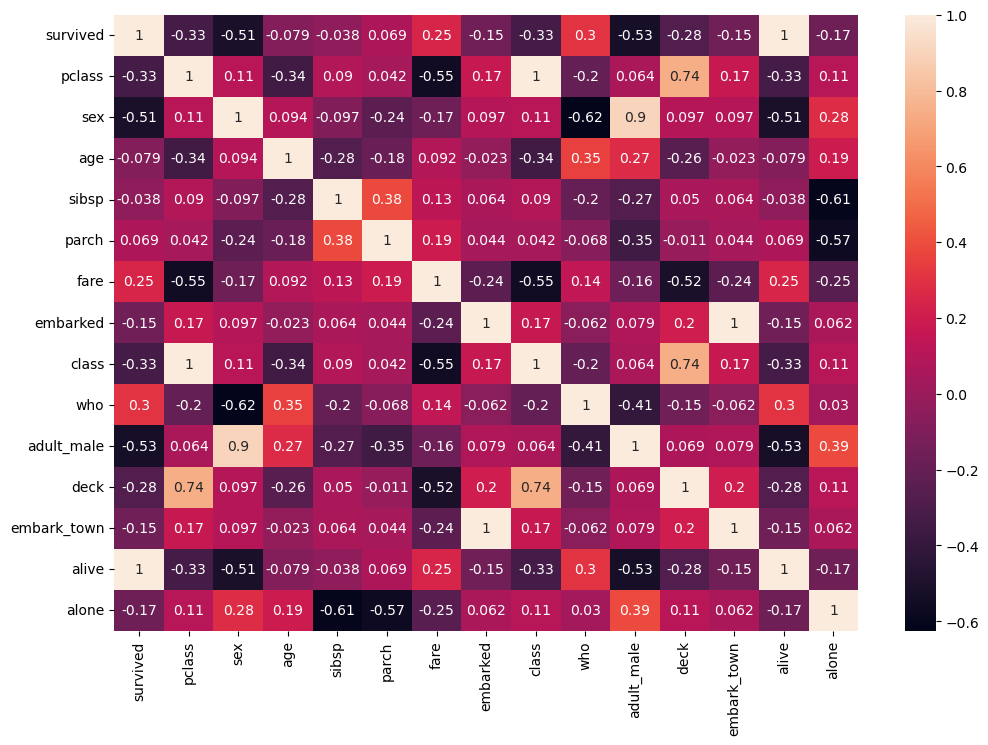

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

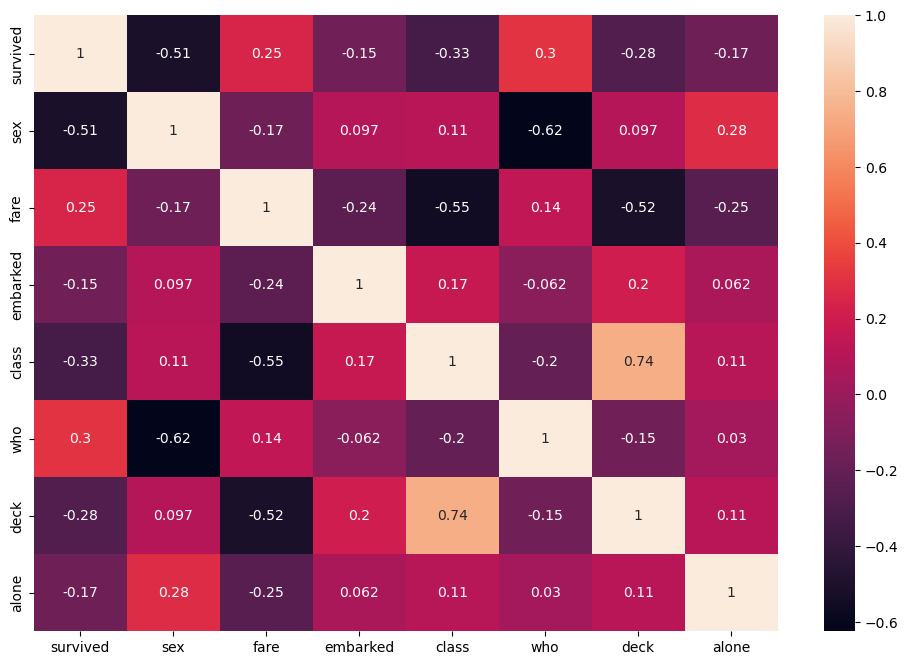

In [54]:
to_remove = ["alive","age", "sibsp", "parch", "embark_town", "pclass", "adult_male"]
df=df.drop(columns=to_remove)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()


## Data Sliptting

In [55]:
X = df.drop(columns=["survived"])
y = df["survived"]
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(624, 7) (157, 7) (624,) (157,)


Choose a classification model (KNN, Decision tree)
train it
test it
calculate the accuracy, precision, recall, f1 score, and confusion matrix

## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=14)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=14)

In [73]:
y_pred = model.predict(X_test)
print(list(y_test[:5]))
print(list(y_pred[:5]))



[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


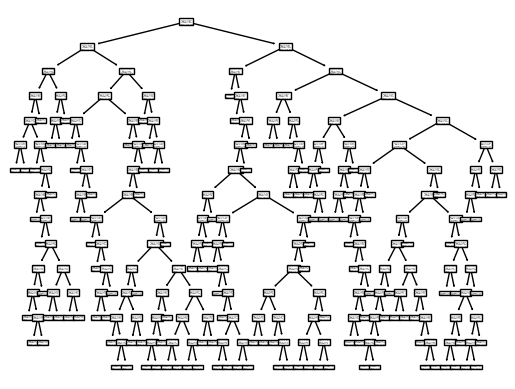

In [74]:
plot_tree(model)
plt.show()

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[75 14]
 [26 42]]
0.7452229299363057
0.75
0.6176470588235294
0.6774193548387096


## SVM


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[83  6]
 [28 40]]
0.7834394904458599
0.8695652173913043
0.5882352941176471
0.7017543859649122


## logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[72 17]
 [18 50]]
0.7770700636942676
0.746268656716418
0.7352941176470589
0.7407407407407407


## KNN

In [82]:
# Choose a classification model (KNN, Decision tree)
from sklearn.neighbors import KNeighborsClassifier as KNN
model = KNN(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


[[79 10]
 [20 48]]
0.8089171974522293
[[79 10]
 [20 48]]
0.8275862068965517
0.7058823529411765
0.7619047619047619


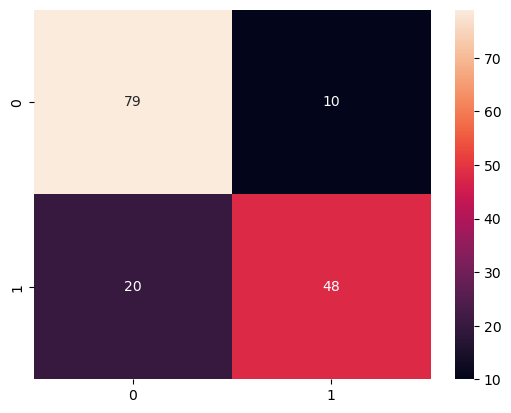

In [83]:
plt.Figure(figsize=(12, 8))
sns.heatmap(cm, annot=True)
plt.show()

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84        89
           1       0.83      0.71      0.76        68

    accuracy                           0.81       157
   macro avg       0.81      0.80      0.80       157
weighted avg       0.81      0.81      0.81       157



In [80]:
for k in range(3, 52, 2):
    model = KNN(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("when k is", k,)
    print(k, accuracy_score(y_test, y_pred))
    print(k, f1_score(y_test, y_pred))

when k is 3
3 0.8089171974522293
3 0.7619047619047619
when k is 5
5 0.802547770700637
5 0.743801652892562
when k is 7
7 0.7643312101910829
7 0.6991869918699187
when k is 9
9 0.7834394904458599
9 0.711864406779661
when k is 11
11 0.7707006369426752
11 0.6842105263157895
when k is 13
13 0.7770700636942676
13 0.6956521739130435
when k is 15
15 0.7770700636942676
15 0.6956521739130435
when k is 17
17 0.7707006369426752
17 0.6785714285714286
when k is 19
19 0.7707006369426752
19 0.6896551724137931
when k is 21
21 0.7770700636942676
21 0.7008547008547008
when k is 23
23 0.7834394904458599
23 0.7068965517241379
when k is 25
25 0.7898089171974523
25 0.7272727272727273
when k is 27
27 0.7834394904458599
27 0.7166666666666667
when k is 29
29 0.7834394904458599
29 0.7166666666666667
when k is 31
31 0.7707006369426752
31 0.6896551724137931
when k is 33
33 0.7707006369426752
33 0.6896551724137931
when k is 35
35 0.7707006369426752
35 0.6896551724137931
when k is 37
37 0.7770700636942676
37 0.700854

In [ ]:
sns.heatmap(df[["age"]], cmap="YlGnBu", cbar=True)
plt.show()

KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"